<a href="https://colab.research.google.com/github/YasithKirihena/Telco-Customer-Churn/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Missing values per column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Fixed Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
Paperless

/tmp/ipython-input-1934800125.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


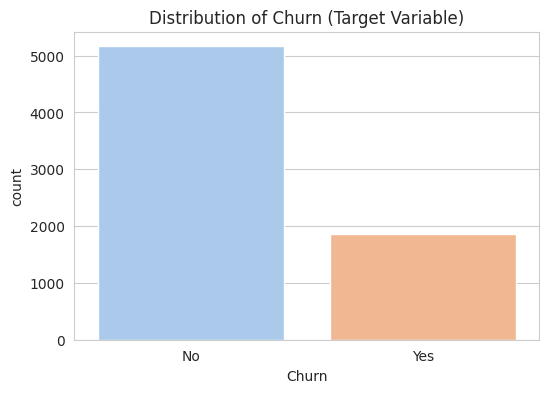

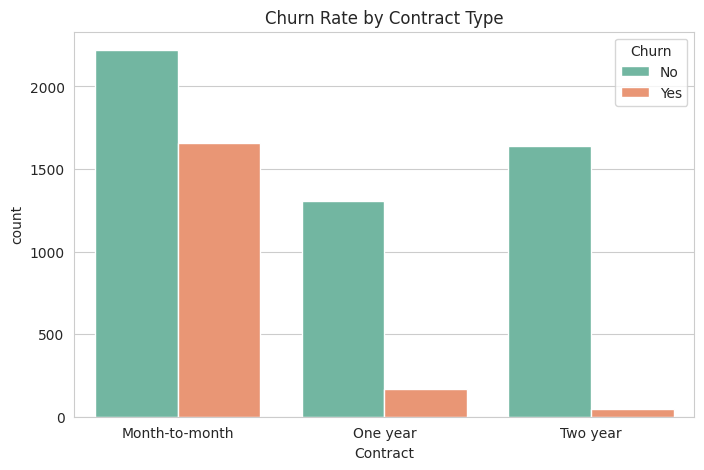

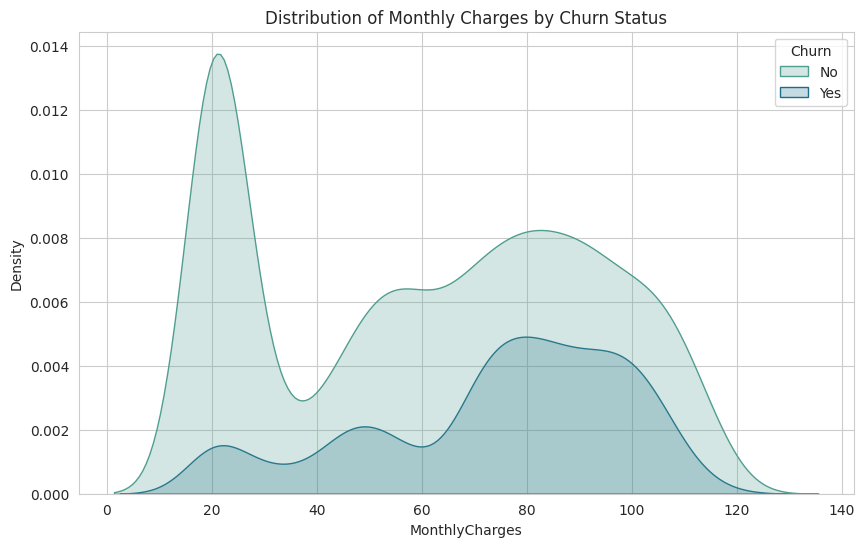

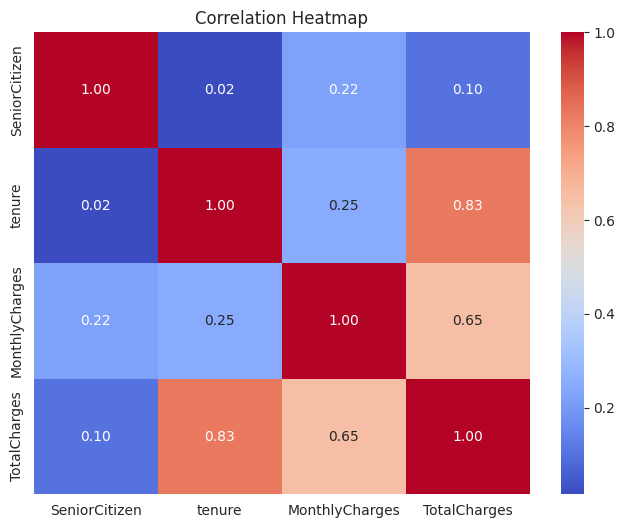

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')# Load the dataset


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # TotalCharges to numeric
print("\nMissing values per column:")
print(df.isnull().sum())
df.dropna(inplace=True)

# show types correct
print("\nFixed Data Types:")
print(df.dtypes)


# ---(1)Exploratory Data Analysis--- #
sns.set_style("whitegrid")

# churned vs stayed
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribution of Churn (Target Variable)')
plt.show()
print()


# contract type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn Rate by Contract Type')
plt.show()
print()

# monthly charges vs churn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, palette='crest')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.show()
print()

# correlation matrix
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ---(2.1)PREPROCESSING--- #

df.drop('customerID', axis=1, inplace=True) #customerID not needed

# Binary Columns
le = LabelEncoder()
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Categorial Columns
df = pd.get_dummies(df, drop_first=True) #dummy columns

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% Training / 20% Testing

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (5625, 30)
Testing Data Shape: (1407, 30)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# --- (2.2)Decision Tree --- #

print("\n Training Decision Tree ")

dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth': [None, 10, 20, 30], #for overfitting
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)


dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print("Best Decision Tree Params:", dt_grid.best_params_)


 Training Decision Tree 
Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


In [14]:
from sklearn.neural_network import MLPClassifier

# ---(2.3)Neural Network--- #

print("\n--- Training Neural Network ---")


mlp = MLPClassifier(random_state=42, max_iter=500) #more time to find the solution
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01]
}

mlp_grid = GridSearchCV(mlp, mlp_params, cv=3, scoring='accuracy', n_jobs=-1)
mlp_grid.fit(X_train, y_train)

# Get the best model
best_mlp = mlp_grid.best_estimator_
print("Best Neural Network Params:", mlp_grid.best_params_)


--- Training Neural Network ---
Best Neural Network Params: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
